**Loading the dataset:**

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("zomato_outlet_final.csv")

**Cleaning and Preprocessing**

In [3]:
data.sample(10)

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,cuisine,cost,liked
3332,https://www.zomato.com/pune/yewale-amruttulya-...,Yewale Amruttulya\r\n ...,Beverage Shop,Parvati,3.3,(5 Reviews),"Tea,",Rs. 100,NaN
1078,https://www.zomato.com/pune/behrouz-biryani-hi...,Behrouz Biryani\r\n ...,NaN,Hinjawadi,NaN,NaN,"Mughlai,North Indian,Biryani,",Rs. 700,NaN
695,https://www.zomato.com/pune/pyasa-restaurant-b...,Pyasa Restaurant & Bar\r\r\n ...,"Bar,Casual Dining",Shukrawar Peth,3.1,(45 Reviews),"Seafood,Chinese,North Indian,","Rs. 1,000",NaN
1357,https://www.zomato.com/pune/chulbul-dhaba-kharadi,Chulbul Dhaba\r\n ...,Casual Dining,Kharadi,4.1,"-3,435","Italian,Maharashtrian,Mughlai,Chinese,North In...",Rs. 800,"Tandoori Chicken, Biryani, Butter Chicken, Bro..."
589,https://www.zomato.com/pune/vista-cafe-hadapsar,Vista Cafe\r\r\n ...,NaN,Hadapsar,3.7,(37 Reviews),"Beverages,Healthy Food,South Indian,Continenta...","Rs. 1,200",NaN
1342,https://www.zomato.com/pune/a1-chinese-kothrud,A1 Chinese\r\n ...,Quick Bites,Kothrud,3.6,-119,"North Indian,Chinese,",Rs. 450,NaN
5172,https://www.zomato.com/pune/hungraze-bavdhan,Hungraze\r\n,NaN,Bavdhan,3.7,(294 Reviews),"Asian,Fast Food,North Indian,",Rs. 500,"Salad, Pizza"
3615,https://www.zomato.com/pune/momos-bowl-company...,Momos Bowl Company\r\n ...,NaN,Viman Nagar,3.2,(233 Reviews),"Fast Food,Momos,",Rs. 300,NaN
3612,https://www.zomato.com/pune/kekiz-the-cake-sho...,Kekiz The Cake Shop\r\n ...,Bakery,Wadgaon Sheri,NaN,NaN,"Desserts,Bakery,",Rs. 350,NaN
5369,https://www.zomato.com/pune/royal-castle-pimpri,Royal Castle\r\n ...,Casual Dining,Pimpri,3.4,-29,"Chinese,Mughlai,Seafood,North Indian,","Rs. 1,000",NaN


In [4]:
data.shape

(5433, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   link          5433 non-null   object 
 1   rest_name     5433 non-null   object 
 2   rest_type     4336 non-null   object 
 3   loc           5433 non-null   object 
 4   dine_rating   4829 non-null   float64
 5   dine_reviews  4829 non-null   object 
 6   cuisine       5433 non-null   object 
 7   cost          5433 non-null   object 
 8   liked         2603 non-null   object 
dtypes: float64(1), object(8)
memory usage: 382.1+ KB


In [6]:
#dropping the first attribute link
data=data.drop(['link'],axis=1)

In [7]:
data.sample()

,rest_name,rest_type,loc,dine_rating,dine_reviews,cuisine,cost,liked
3765,The Cake House N Cafe\r\n ...,Quick Bites,Katraj,3.5,-14,"Fast Food,",Rs. 300,NaN


In [8]:
data['rest_name']

0       Mix@36 - The Westin\r\r\n                     ...
1       Kangan - The Westin\r\r\n                     ...
2       Coriander Kitchen - Conrad Pune\r\r\n         ...
3       The Market - The Westin\r\r\n                 ...
4       Vandaag - Vivanta Pune\r\r\n                  ...
                              ...                        
5428    Murli Pure Veg\r\n                            ...
5429    The Irani Cafe Restaurant\r\n                 ...
5430    Hotel Shilpa Gavran\r\n                       ...
5431    MH 12 Pav Bhaji & Juice Center\r\n            ...
5432    Liyo China\r\n                                ...
Name: rest_name, Length: 5433, dtype: object

In [9]:
#cleaning the rest_name attribute
def namehandle(value):
    if '\r\r\n                                    ' in value:
        value = value.replace('\r\r\n                                    ', '')
    if '\r\n                                    ' in value:
        value = value.replace('\r\n                                    ', '')
    else:
        return value
data['rest_name'] = data['rest_name'].apply(namehandle)
data['rest_name'].unique()

array(['Mix@36 - The Westin', 'Kangan - The Westin',
       'Coriander Kitchen - Conrad Pune', 'The Market - The Westin',
       'Vandaag - Vivanta Pune', 'Baan Tao - Hyatt Pune',
       'Zeera - Conrad Pune', 'Koji - Conrad Pune',
       'Feast - Sheraton Grand', 'Aasmana: The Ritz-Carlton',
       'Kabana - Conrad Pune', 'Masu - Conrad Pune',
       'Level 12 - DoubleTree By Hilton Hotel', 'Kitsch - The O Hotel',
       'Roof Top Bar - Sheraton Grand',
       'Connexions Lounge & Bar - Ramada Plaza',
       'Asian Harbour - Vivanta Pune',
       'Oak Lounge - Marriott Suites Pune',
       'The Cafè - Hyatt Regency Pune', 'Eighty Eight - Hyatt Pune',
       'Easy - Blue Diamond', 'Paasha - JW Marriott Pune',
       'Evviva Sky Lounge - Crowne Plaza Pune City Centre',
       'Mosaic - Crowne Plaza Pune City Centre',
       'Ukiyo: The Ritz-Carlton', 'Mi-a-Mi - JW Marriott Pune',
       'TGI Fridays', 'Chingari - Sheraton Grand',
       'The House Of Medici - The Westin',
       'Whispe

In [10]:
#extracting the integers only
def clean_data(cols, str_to_replace):           
    for col in cols:
        data[col] = [str(x).replace(str_to_replace,"") for x in data[col]]       
    return data
def extract_digit(cols):
    for col in cols:
        data[col] = data[col].str.extract(r'(\d+)', expand=True)
    return data
data = clean_data(['cost', 'dine_reviews'], ",")
data = extract_digit(['cost', 'dine_reviews'])

In [11]:
def convert_cols(cols):
    for col in cols:
        data[col] = data[col].astype(float)   
    return data
data = convert_cols(['dine_reviews','cost'])

In [12]:
data.head(3)

,rest_name,rest_type,loc,dine_rating,dine_reviews,cuisine,cost,liked
0,Mix@36 - The Westin,Lounge,"The Westin, Mundhwa",4.2,707.0,"North Indian,Continental,Asian,Finger Food,",4300.0,"Cocktails, Chaat, Beer"
1,Kangan - The Westin,Fine Dining,"The Westin, Mundhwa",4.1,344.0,"North Indian,Mughlai,",3500.0,"Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,Coriander Kitchen - Conrad Pune,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,"Mediterranean,Asian,North Indian,",3200.0,"Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."


In [13]:
#Checking for duplicates:
data.drop_duplicates()

,rest_name,rest_type,loc,dine_rating,dine_reviews,cuisine,cost,liked
0,Mix@36 - The Westin,Lounge,"The Westin, Mundhwa",4.2,707.0,"North Indian,Continental,Asian,Finger Food,",4300.0,"Cocktails, Chaat, Beer"
1,Kangan - The Westin,Fine Dining,"The Westin, Mundhwa",4.1,344.0,"North Indian,Mughlai,",3500.0,"Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,Coriander Kitchen - Conrad Pune,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,"Mediterranean,Asian,North Indian,",3200.0,"Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,The Market - The Westin,Fine Dining,"The Westin, Mundhwa",4.0,55.0,"Asian,European,North Indian,",3200.0,"Vanilla Ice Cream, Chaat, Sushi"
4,Vandaag - Vivanta Pune,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,113.0,"Finger Food,Continental,",3100.0,"Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."
...,...,...,...,...,...,...,...,...
5428,None,Casual Dining,Sinhgad Road,3.1,22.0,"South Indian,Chinese,North Indian,",550.0,NaN
5429,None,Casual Dining,Viman Nagar,2.9,80.0,"Mughlai,Iranian,",800.0,"Naan, Mutton Keema, Dum Biryani, Irani Chai, B..."
5430,None,Casual Dining,Pimpri,3.8,90.0,"Chinese,Fast Food,North Indian,",500.0,"Mutton Thali, Chicken Sukha"
5431,None,Quick Bites,Sadashiv Peth,3.1,24.0,"Beverages,Chinese,Street Food,Fast Food,",250.0,NaN


**EDA**

In [14]:
#importing the libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Number of outlets')

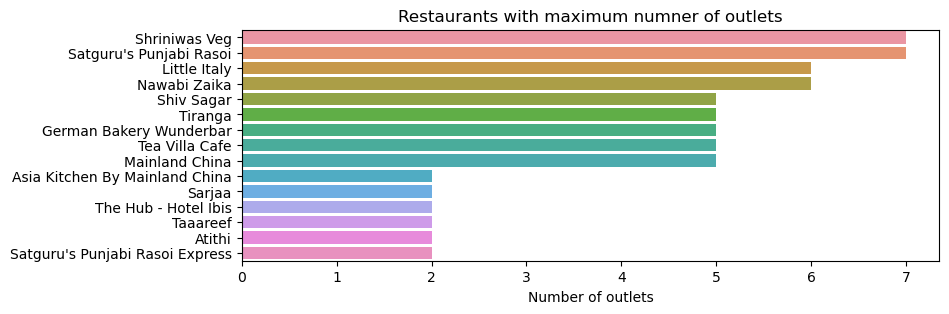

In [15]:
plt.figure(figsize=(9,3))
chains=data['rest_name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index.str.rstrip())
plt.title("Restaurants with maximum numner of outlets")
plt.xlabel("Number of outlets")

**INFERENCE:
Shriniwas Veg and Satguru's Punjabi Rasoi has the highest number of outlets(7) according to this dataset.**

C:\Users\harin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of restaurants in Location')

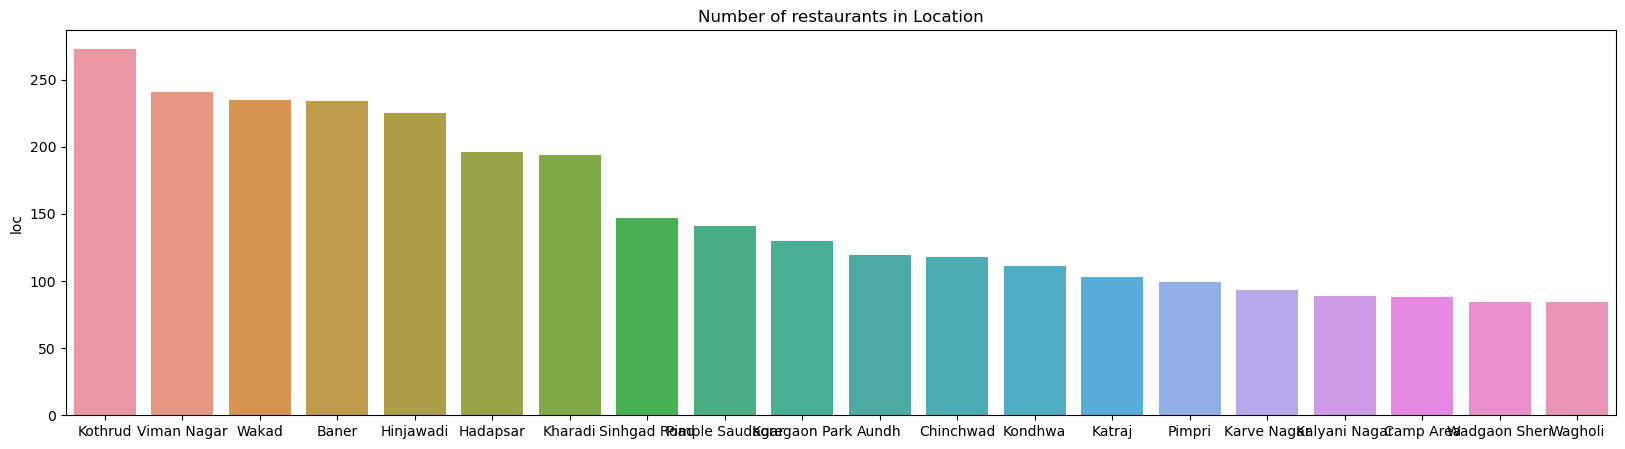

In [16]:
plt.figure(figsize=(20,5))
locations=data['loc'].value_counts()[:20]
graph = sns.barplot(locations.index,locations)
graph
plt.title("Number of restaurants in Location")

**Kharadi have around 200 restaurants**

In [17]:
#top 5 locations:
loc_count = data['loc'].value_counts() 
loc_count = loc_count.sort_values(ascending=False, axis=0)
loc_count=loc_count.head()
loc_count = loc_count.sort_values(ascending=False, axis=0)
loc_count

Kothrud        273
Viman Nagar    241
Wakad          235
Baner          234
Hinjawadi      225
Name: loc, dtype: int64

**INFERENCE:
Kothrud is the city with more number of restaurants**

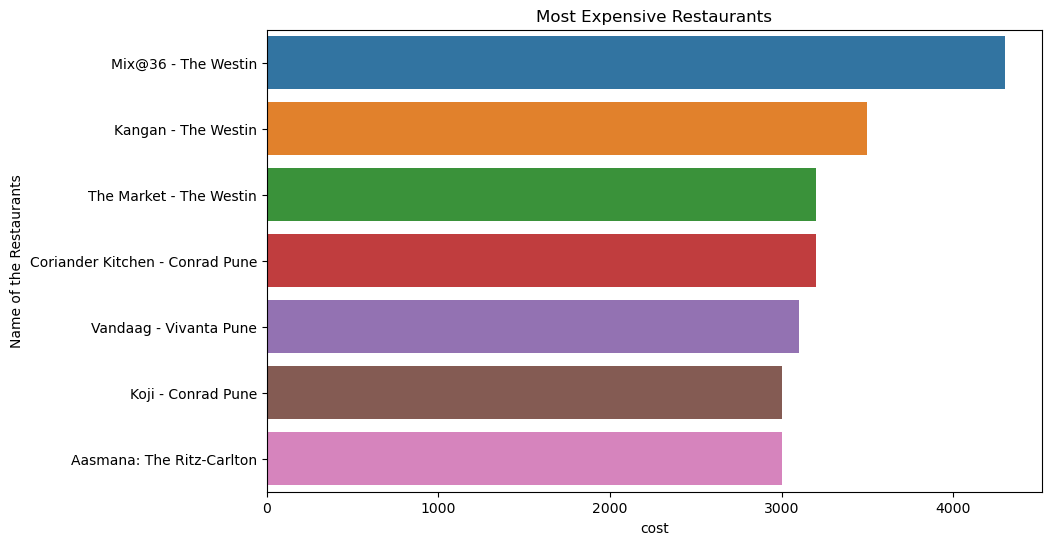

In [18]:
def bar_plot(col, title):
    c = data[['rest_name', col]].sort_values(by=col, ascending=False)[:10]
    plt.figure(figsize=(10, 6))
    g = sns.barplot(x=c[col], y=c['rest_name'].str.rstrip())
    plt.title(title)
    plt.ylabel('Name of the Restaurants')
    plt.show()
bar_plot('cost',"Most Expensive Restaurants")

**Inference:
  The Westin, Mundhwa location has the most expensive restaurants**

C:\Users\harin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cost Distrubution for all restaurants')

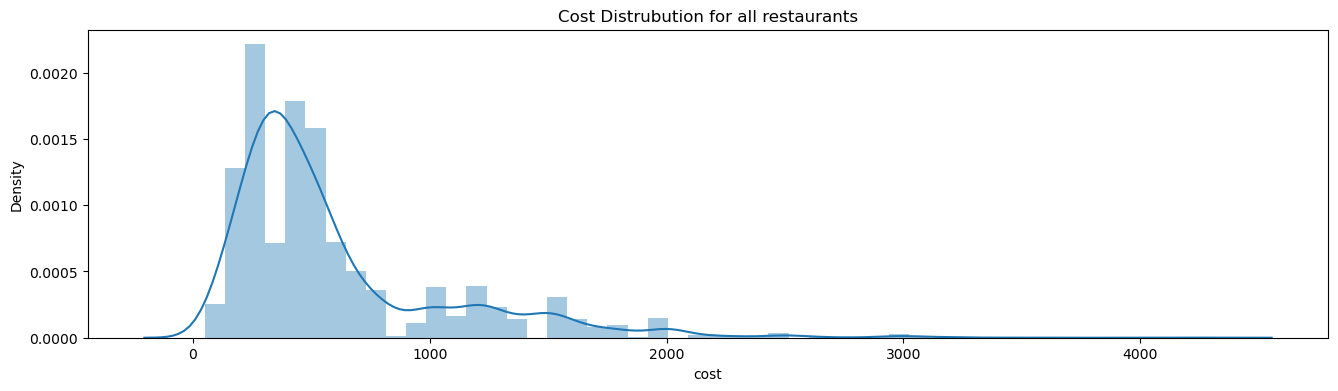

In [19]:
#'Cost Distribution'
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(data['cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants')

**INFERENCE:
Most of the restaurants are budget friendly in Pune**

Text(0, 0.5, 'count')

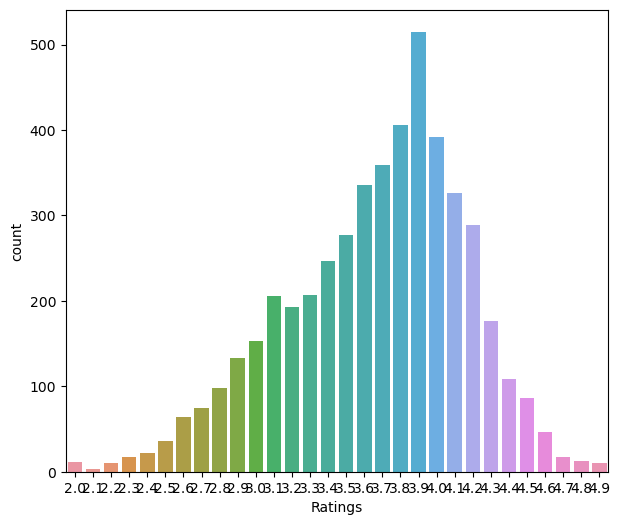

In [20]:
#Rating Distribution
plt.figure(figsize=(7,6))
rating=data['dine_rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

**Inference:
More than 50% restaurants have rating between 3.5 and 4**

In [42]:
cheapbest=data[['cost', 'loc','rest_type','cuisine', 'dine_rating','dine_reviews']]
cheapbest=data[(data['cost']<1000) & (data['dine_rating']>4.3) & (data['dine_reviews']>4000)]
cheapbest['loc']

772             FC Road
965     Deccan Gymkhana
1304          Erandwane
1380    Deccan Gymkhana
2420              Aundh
Name: loc, dtype: object

**Inference:
In Pune Cheap and best food are found in Deccan Gymkhana**

Text(0.5, 0, 'Number of restaurants')

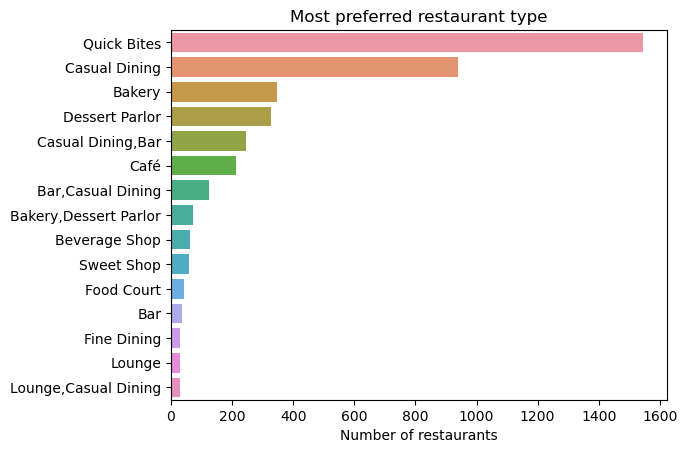

In [23]:
r_type =data['rest_type'].value_counts()[:15]
sns.barplot(x=r_type,y=r_type.index)
plt.title("Most preferred restaurant type")
plt.xlabel("Number of restaurants")

**INFERENCE:
Quick bites is preferred by most people in Pune**

In [24]:
data['rest_name'].unique()

array(['Mix@36 - The Westin', 'Kangan - The Westin',
       'Coriander Kitchen - Conrad Pune', 'The Market - The Westin',
       'Vandaag - Vivanta Pune', 'Baan Tao - Hyatt Pune',
       'Zeera - Conrad Pune', 'Koji - Conrad Pune',
       'Feast - Sheraton Grand', 'Aasmana: The Ritz-Carlton',
       'Kabana - Conrad Pune', 'Masu - Conrad Pune',
       'Level 12 - DoubleTree By Hilton Hotel', 'Kitsch - The O Hotel',
       'Roof Top Bar - Sheraton Grand',
       'Connexions Lounge & Bar - Ramada Plaza',
       'Asian Harbour - Vivanta Pune',
       'Oak Lounge - Marriott Suites Pune',
       'The Cafè - Hyatt Regency Pune', 'Eighty Eight - Hyatt Pune',
       'Easy - Blue Diamond', 'Paasha - JW Marriott Pune',
       'Evviva Sky Lounge - Crowne Plaza Pune City Centre',
       'Mosaic - Crowne Plaza Pune City Centre',
       'Ukiyo: The Ritz-Carlton', 'Mi-a-Mi - JW Marriott Pune',
       'TGI Fridays', 'Chingari - Sheraton Grand',
       'The House Of Medici - The Westin',
       'Whispe

In [25]:
data['rest_name'].nunique()

720

**Inference: This data is uploaded in Kaggle at 2020, so at that time there were around 720 restaurants available in Pune**

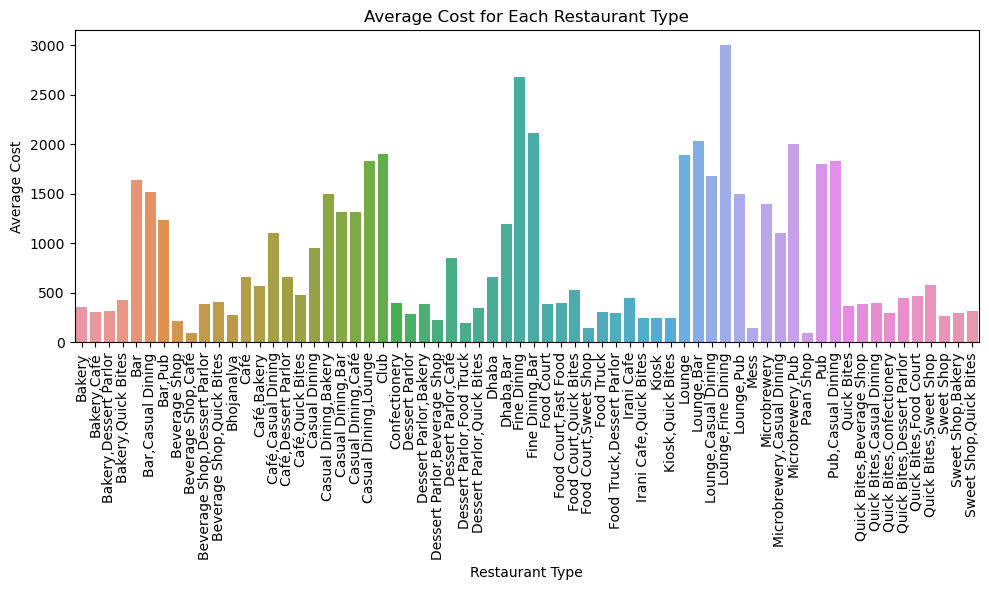

In [26]:
avg_cost = data.groupby('rest_type')['cost'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='rest_type', y='cost', data=avg_cost)
plt.xticks(rotation=90)
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost')
plt.title('Average Cost for Each Restaurant Type')
plt.tight_layout()
plt.show()

**Inference: The Fine Dining Restaurant types makes more money in average**

In [27]:
data['liked']

0                                  Cocktails, Chaat, Beer
1       Biryani, Veg Platter, Dal Makhani, Butter Chic...
2       Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,...
3                         Vanilla Ice Cream, Chaat, Sushi
4       Cocktails, Beer, Peri Peri Chicken, Fish, Veg ...
                              ...                        
5428                                                  NaN
5429    Naan, Mutton Keema, Dum Biryani, Irani Chai, B...
5430                          Mutton Thali, Chicken Sukha
5431                                                  NaN
5432                                               Noodle
Name: liked, Length: 5433, dtype: object

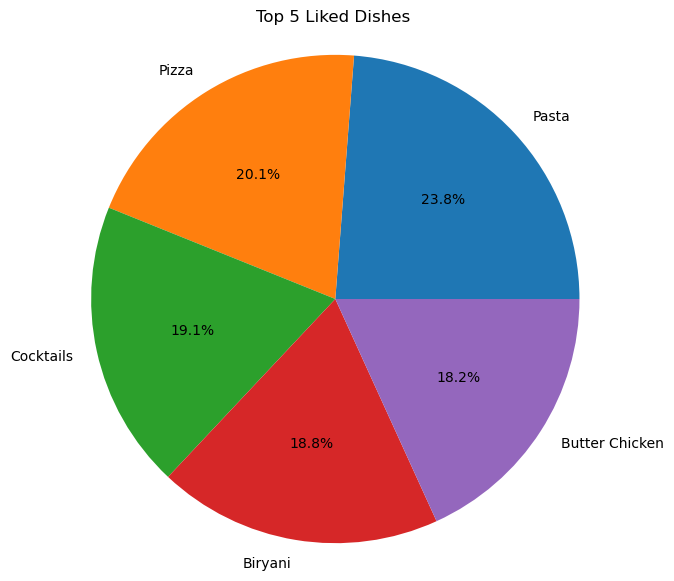

In [37]:
from collections import Counter
liked_dishes_list = data['liked'].dropna().str.split(',').tolist()
flattened_liked_dishes = [dish.strip() for sublist in liked_dishes_list for dish in sublist]
dish_counts = Counter(flattened_liked_dishes)
top_5_liked_dishes = dict(dish_counts.most_common(5))
plt.figure(figsize=(7, 7))
plt.pie(top_5_liked_dishes.values(), labels=top_5_liked_dishes.keys(), autopct='%1.1f%%', startangle=0)
plt.title('Top 5 Liked Dishes')
plt.axis('equal')
plt.show()


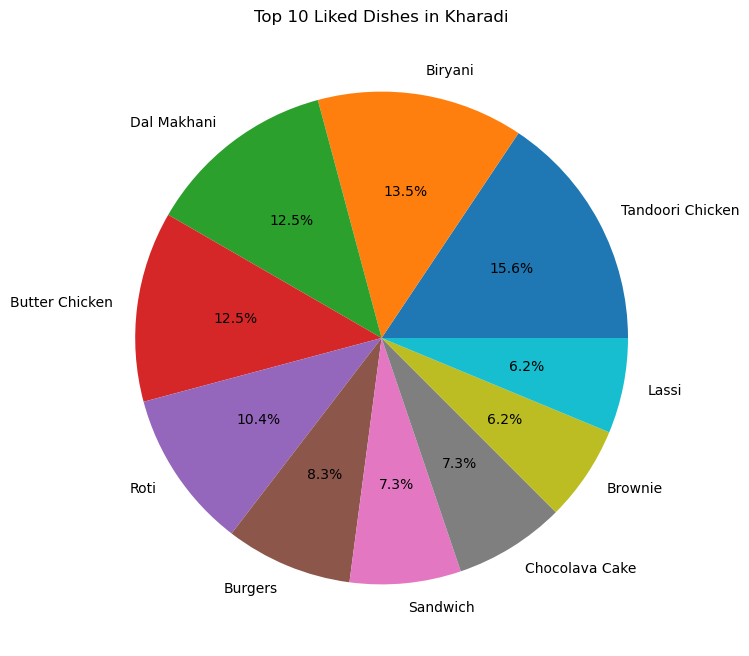

In [29]:
kharadi_data = data[data['loc'] == 'Kharadi']
liked_dishes_list = kharadi_data['liked'].dropna().str.split(',').tolist()
flattened_liked_dishes = [dish.strip() for sublist in liked_dishes_list for dish in sublist]
dish_counts = Counter(flattened_liked_dishes)
top_5_liked_dishes = dict(dish_counts.most_common(10))
plt.figure(figsize=(8, 8))
plt.pie(top_5_liked_dishes.values(), labels=top_5_liked_dishes.keys(), autopct='%1.1f%%')
plt.title('Top 10 Liked Dishes in Kharadi')
plt.show()


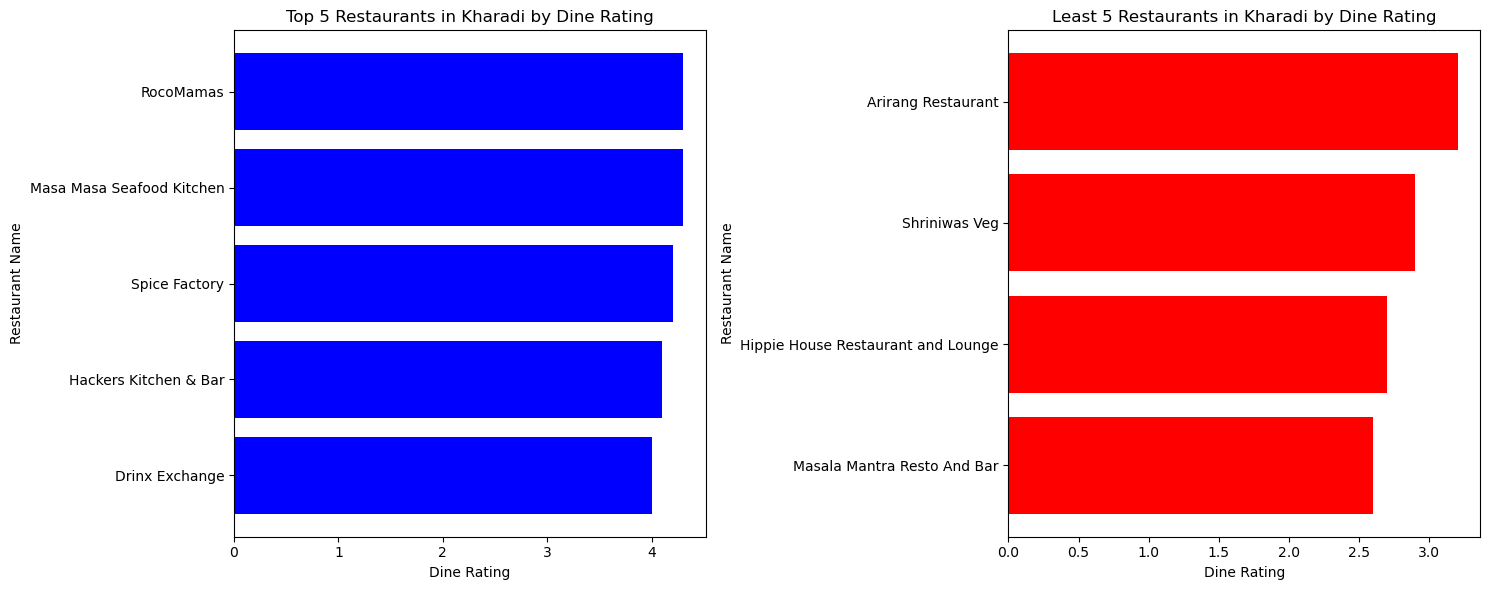

In [30]:
kharadi_data_filtered = kharadi_data[kharadi_data['rest_name'].notna()]
sorted_kharadi_data = kharadi_data_filtered.sort_values(by='dine_rating', ascending=False)
top_5_restaurants = sorted_kharadi_data.head(5)
least_5_restaurants = sorted_kharadi_data.tail(5)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].barh(top_5_restaurants['rest_name'], top_5_restaurants['dine_rating'], color='blue')
axes[0].set_xlabel('Dine Rating')
axes[0].set_ylabel('Restaurant Name')
axes[0].set_title('Top 5 Restaurants in Kharadi by Dine Rating')
axes[0].invert_yaxis()  
axes[1].barh(least_5_restaurants['rest_name'], least_5_restaurants['dine_rating'], color='red')
axes[1].set_xlabel('Dine Rating')
axes[1].set_ylabel('Restaurant Name')
axes[1].set_title('Least 5 Restaurants in Kharadi by Dine Rating')
axes[1].invert_yaxis()
plt.tight_layout() 
plt.show()

In [32]:
data['cuisine']

0       North Indian,Continental,Asian,Finger Food,
1                             North Indian,Mughlai,
2                 Mediterranean,Asian,North Indian,
3                      Asian,European,North Indian,
4                          Finger Food,Continental,
                           ...                     
5428             South Indian,Chinese,North Indian,
5429                               Mughlai,Iranian,
5430                Chinese,Fast Food,North Indian,
5431       Beverages,Chinese,Street Food,Fast Food,
5432                                  Thai,Chinese,
Name: cuisine, Length: 5433, dtype: object

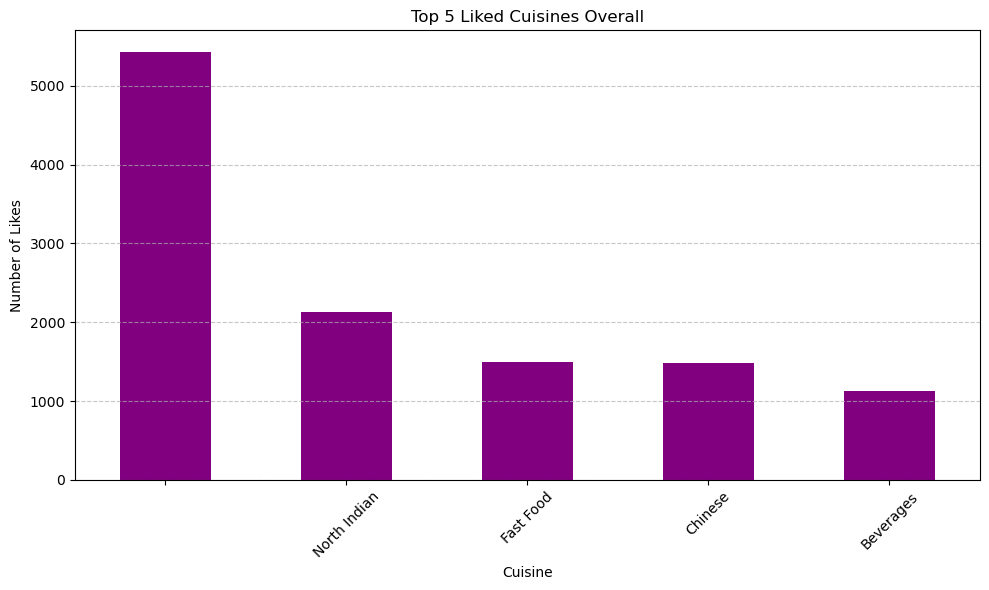

In [38]:
cuisine_data = data['cuisine']
cuisine_list = cuisine_data.str.split(',')
flat_cuisine_list = [cuisine.strip() for sublist in cuisine_list for cuisine in sublist]
cuisine_counts = pd.Series(flat_cuisine_list).value_counts()
top_5_cuisines = cuisine_counts.head(5)
# Plotting
plt.figure(figsize=(10, 6))
top_5_cuisines.plot(kind='bar', color='purple')
plt.xlabel('Cuisine')
plt.ylabel('Number of Likes')
plt.title('Top 5 Liked Cuisines Overall')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


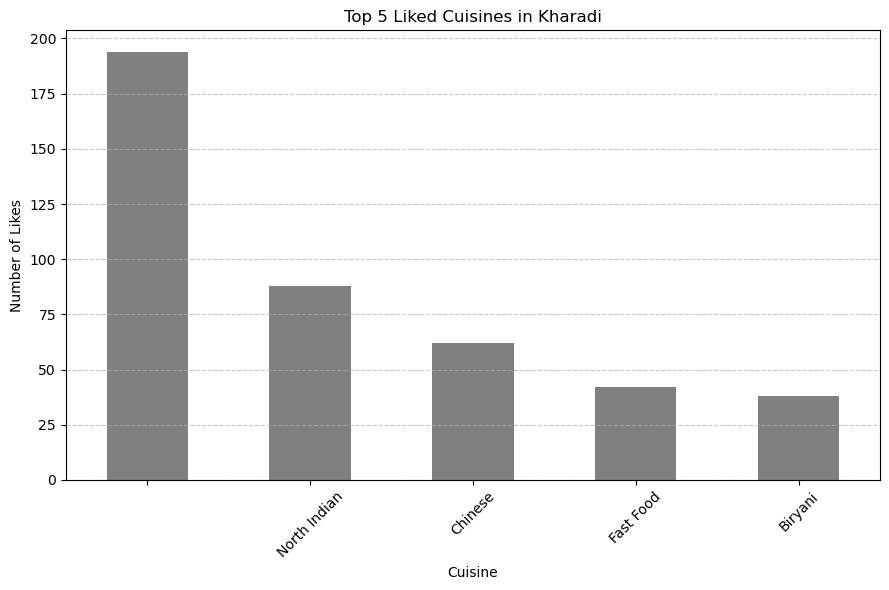

In [43]:
kharadi_data = data[data['loc'] == 'Kharadi']
cuisine_data_kharadi = kharadi_data['cuisine']
cuisine_list_kharadi = cuisine_data_kharadi.str.split(',')
flat_cuisine_list_kharadi = [cuisine.strip() for sublist in cuisine_list_kharadi for cuisine in sublist]
cuisine_counts_kharadi = pd.Series(flat_cuisine_list_kharadi).value_counts()
top_5_cuisines_kharadi = cuisine_counts_kharadi.head(5)
plt.figure(figsize=(9, 6))
top_5_cuisines_kharadi.plot(kind='bar', color='grey')
plt.xlabel('Cuisine')
plt.ylabel('Number of Likes')
plt.title('Top 5 Liked Cuisines in Kharadi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
cheapbest=data[['cost', 'loc','rest_type','cuisine', 'dine_rating','dine_reviews']]
cheapbest=data[(data['cost']<1500) & (data['dine_rating']>4.0)  & (data['loc']=='Kharadi')]
cheapbest['rest_name'].head(2)

419    Masa Masa Seafood Kitchen
468                    RocoMamas
Name: rest_name, dtype: object

**INFERENCE**

**The affordable and the good food in Kharadi is in Masa Masa Seafood Kitchen and RocoMamas**